### Analisando as Vendas

In [ ]:
import pandas as pd

In [ ]:
alucar = pd.read_csv('alucar.csv')

In [ ]:
alucar.shape

In [ ]:
#Quantos Dados tem no total, seja na coluna mes ou coluna vendas
alucar.isna().sum().sum()

In [ ]:
alucar.dtypes

In [ ]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

In [ ]:
! pip install seaborn==0.9.0
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
print(sns.__version__)

In [ ]:
sns.lineplot(x='mes',y='vendas',data=alucar)

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes',y='vendas',data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018',loc='left',fontsize = 18)
ax.set_xlabel('Tempo',fontsize=14)
ax.set_ylabel('Vendas (R$)',fontsize=14)
ax = ax

### Decomposição de Vendas

In [25]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [31]:
def plotar(titulo,labelx,labely,x,y,dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x,y=y,data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo,loc='left',fontsize = 18)
    ax.set_xlabel(labelx,fontsize=14)
    ax.set_ylabel(labely,fontsize=14)
    ax = ax

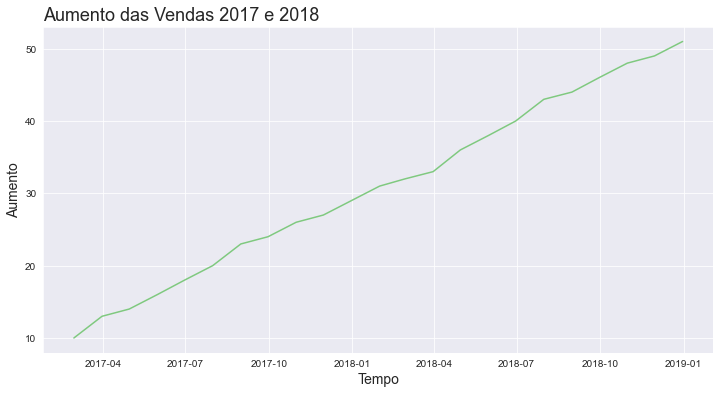

In [32]:
plotar('Aumento das Vendas 2017 e 2018','Tempo','Aumento','mes','aumento',alucar)

In [34]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


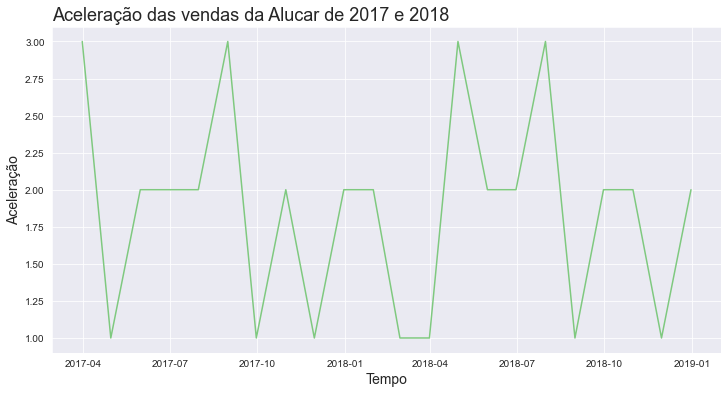

In [35]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018','Tempo','Aceleração','mes','aceleracao',alucar)

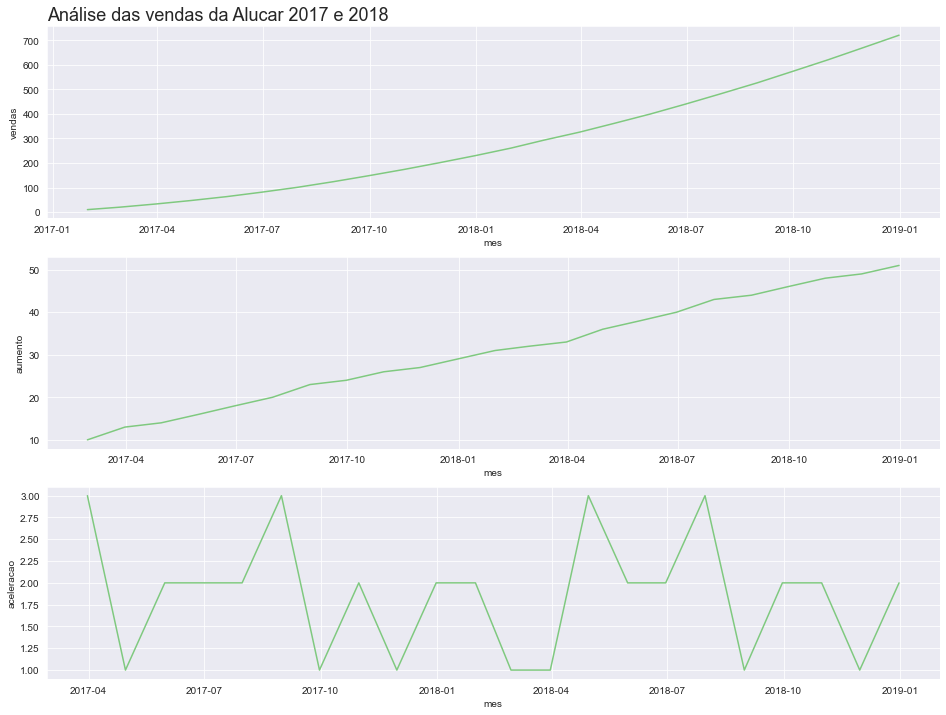

In [36]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise das vendas da Alucar 2017 e 2018',fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax

In [37]:
def plot_comparacao(x,y1,y2,y3,dataset,titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax



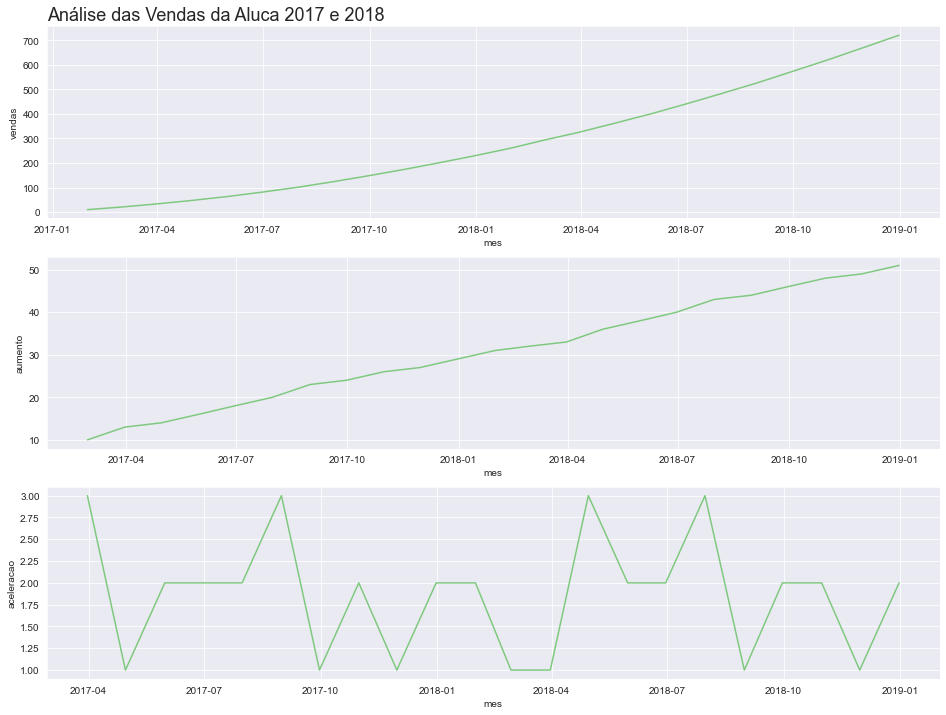

In [38]:
plot_comparacao('mes','vendas','aumento','aceleracao',alucar,'Análise das Vendas da Aluca 2017 e 2018')

### Autocorrelação

In [39]:
from pandas.plotting import autocorrelation_plot

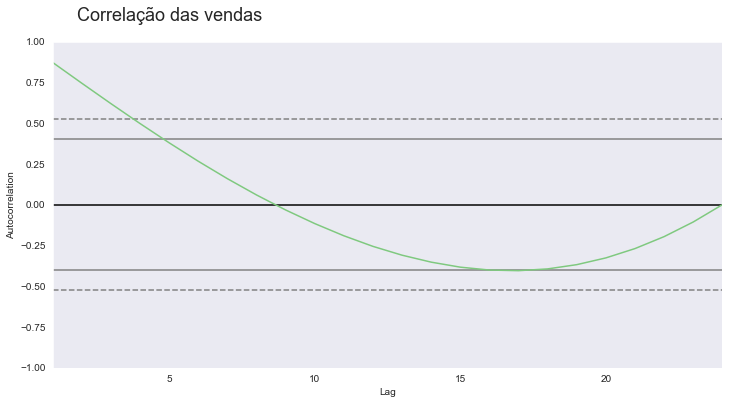

In [45]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas',fontsize=18,x=0.26,y=0.96)
autocorrelation_plot(alucar['vendas'])
ax=ax

Percebemos que os primeiros 7 dias do mês possuem correlação alta, mas depois não.

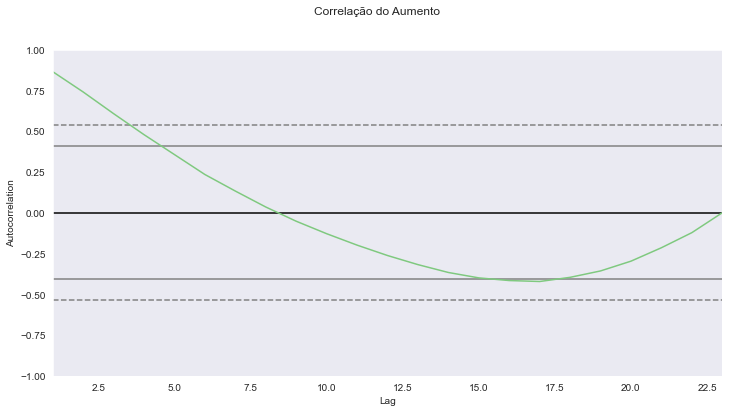

In [46]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento')
autocorrelation_plot(alucar['aumento'][1:])
#esse [1:] foi porque o primeiro indice é nulo ai dava erro no grafico, assim consideramos a analise a partir da seg linha
ax=ax

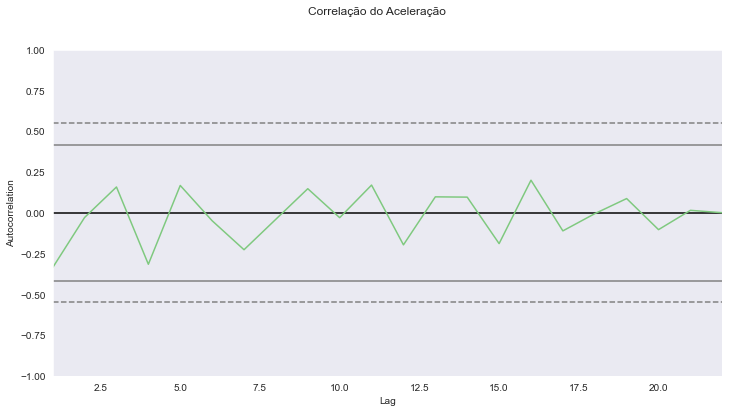

In [47]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aceleração')
autocorrelation_plot(alucar['aceleracao'][2:])
ax=ax